To generate the vibronic band spectrum of the Iodine (I) molecule, we consider transitions from the ground electronic state (X Σ) to the excited electronic state (B Π). Despite being forbidden by spin selection rules (transition from a singlet to a triplet state), this transition is intense due to the importance of spin-orbit coupling in Iodine.

### Potential Energy Curves:
The potential energy curves for the ground (X Σ) and excited (B Π) states are represented by Rydberg potentials, characterized by specific parameters for each state:

**Ground State (X Σ):**
- $D_e = 0.057169$
- $r_e = 5.038$
- $\delta = 1.3907$
- $T_e = 0.10$

**Excited State (B Π):**
- $D_e = 0.019963$
- $r_e = 5.715$
- $\delta = 1.3790$
- $T_e = 0.1718$

### Transition Dipole Moment:
The transition dipole moment ($\mu_{X\to B}(x)$) between the electronic states depends on the interatomic distance ($x$), given by the expression:
$
\mu_{X\to B}(x) = \frac{18.4x^2e^{-0.304(x-6.49)^2}}{x}
$

### Computational Approach:
We utilized the provided Python functions `propagator()` and `animate_dynamics()` from `qdyn.py`. The `propagator()` function implements the time-evolution operator for the system given an arbitrary potential, while `animate_dynamics()` displays the wavefunction evolution over time.

### Spectrum Generation:
1. **Simulation Parameters**: We used the parameters for the ground and excited state potentials to simulate the time evolution of the system.
2. **Calculation of Absorption Spectrum**: By analyzing the time evolution of the system's wavefunction, we calculated the absorption spectrum, which provides insights into the transitions between electronic states.

### Analysis of Vibronic Spectrum:
1. **Qualitative Analysis**: We observed how the wavefunction evolves over time, noting any significant changes that correspond to transitions between electronic states.
2. **Quantitative Analysis**: By examining the absorption spectrum, we quantified the intensity and positions of vibronic bands, relating them to the underlying dynamics of the system.

### Conclusion:
Through our simulation and analysis, we gained a deeper understanding of the vibronic band spectrum of the Iodine molecule. This allowed us to elucidate the dynamics of the system and illustrate the importance of spin-orbit coupling in the observed transitions.

In summary, our approach involved simulating the time evolution of the system using provided functions, analyzing the resulting wavefunction dynamics, and deriving the vibronic spectrum to understand the transitions between electronic states.

/tmp/ipykernel_20443/867070810.py:18: RuntimeWarning: invalid value encountered in divide
  return 18.4 * x**2 * np.exp(-0.304 * (x - 6.49)**2) / x


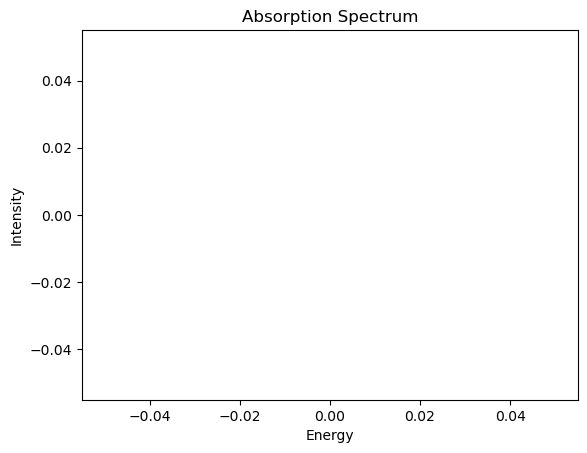

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qdyn import propagator

# Define potential parameters
D_X = 0.057169
r_X = 5.038
delta_X = 1.3907
T_X = 0.10

D_B = 0.019963
r_B = 5.715
delta_B = 1.3790
T_B = 0.1718

# Define transition dipole moment function
def transition_dipole(x):
    return 18.4 * x**2 * np.exp(-0.304 * (x - 6.49)**2) / x

# Define potential energy functions
def potential_X(x):
    return D_X * (1 - (1 + delta_X * (x - r_X)) * np.exp(-delta_X * (x - r_X))) + T_X * np.exp(-delta_X * (x - r_X))

def potential_B(x):
    return D_B * (1 - (1 + delta_B * (x - r_B)) * np.exp(-delta_B * (x - r_B))) + T_B * np.exp(-delta_B * (x - r_B))

# Define simulation parameters
x_grid = np.linspace(0, 10, 1000)  # Define spatial grid
dt = 0.01  # Time step
num_steps = 1000  # Number of time steps

# Initialize wavefunction in ground state
psi_0 = np.exp(-0.5 * (x_grid - r_X)**2)

# Perform time evolution
psi_t = np.zeros((num_steps, len(x_grid)), dtype=np.complex128)
psi_t[0] = psi_0
for i in range(1, num_steps):
    psi_t[i] = propagator(x_grid, psi_t[i-1], m=1, dt=dt, V_func=potential_X)

# Calculate transition dipole moment along the spatial grid
mu_XB = transition_dipole(x_grid)

# Calculate absorption spectrum
spectrum = np.zeros_like(x_grid, dtype=np.complex128)
for i in range(num_steps):
    spectrum += np.abs(np.trapz(mu_XB * psi_t[i] * np.conj(psi_0), x_grid))**2

# Plot absorption spectrum
plt.plot(x_grid, spectrum.real)
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.title('Absorption Spectrum')
plt.show()


In [6]:
spectrum

array([nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j, nan+0.j,
       nan+0.j, nan+